In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 8]
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_all_merge = pd.read_json('/fastcampus-data/select_column.json', encoding = 'utf-8')
df = df_all_merge.copy()

# 사용할 컬럼 정렬
df = df[['_id','customer_id','age_group', '한의사 여부', '사업자 여부',
         'name_x','name','slug','product_ids', 'category_id_y','regular_price',
         'date_paid', 'paid','cancelled',
         ]]

In [6]:
len(df_all_merge)

180211

In [5]:
df_all_merge.product_ids.value_counts()

5ff2d56f5ae455001b219ae2    4390
60d018b7d26af90681b18980    2505
6226b268f967570023fa9ea3    2486
60236e092c593a001ace9ffa    1696
6153c87c4cf9a5002287c4a6    1539
                            ... 
5fb769785120316334324aaa       1
5fbde8bece872a1a803a7d60       1
5fd1c8920204ef001a67f617       1
609a372a0ccc56001bc7db0f       1
6108cb63d26af90681b1e127       1
Name: product_ids, Length: 3367, dtype: int64

# preprocessing

## 1. label encoding

In [5]:
# label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.loc[:,'cancelled'] = le.fit_transform(df['cancelled'])
df.loc[:,'paid'] = le.fit_transform(df['paid'])

## 2. paid_date processing

In [6]:
# date 조회하기 위해 전처리
df['date_paid'] = df['date_paid'].apply(lambda x: x.replace('T', ' ')[:-5] if type(x)==str else None)

# df_paid_complete: 지불 완료하고 취소 안한 거래

In [7]:
# real paid
df_paid_complete = df[(df['paid'] == 1) & (df['cancelled'] == 0)]

In [8]:
print('원본   :', df.shape)
print('지불완료: ', df_paid_complete.shape)

원본   : (180211, 14)
지불완료:  (137395, 14)


In [10]:
# save to df_paid_complete.csv

from pathlib import Path 
filepath = Path('/home/user_4/apriori/df_paid_complete.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_paid_complete.to_csv(filepath)

# df_clean: 22.5.12 이후의 데이터

In [55]:
from datetime import datetime

df_paid_complete.date_paid = pd.to_datetime(df_paid_complete.date_paid)
df_clean = df_paid_complete[df_paid_complete.date_paid >= "2022-05-12"]

In [57]:
df_clean.shape

(48874, 14)

In [202]:
df_clean

,_id,customer_id,age_group,한의사 여부,사업자 여부,name_x,name,slug,product_ids,category_id_y,regular_price,date_paid,paid,cancelled
122257,62354552f967570023fb002e,5dad06d10dabe405b156ee57,30-39,1.0,1.0,"동방 수침 9,000쌈+1,000쌈 증정 (100,000pcs)",소모품,expendables,60893ae9c1908b001a63fc79,5e91ce6fbfe42609447852d1,1700000,2022-05-13 04:04:00,1,0
125972,6243ac5e6f766b002466abda,5db11be70dabe405b156f2b9,20-29,1.0,1.0,HCK 엘리베이션베드 (E100),치료실 물품,clincal-equipment,610cd88909c63a06ed1489fe,5e5d8fe7bfe4260944782c19,850000,2022-06-13 06:02:00,1,0
135510,626bf75996089d00224134c4,625aa5cbcb28e6002469eb79,None,0.0,0.0,임상해부학 특강,온라인 강의,lecture,60236e092c593a001ace9ffa,5ea40b671a3ca36b967849ad,88000,2022-05-18 01:04:00,1,0
138220,6278da149d93880024062480,5e5a51f4bfe4260944782b2a,20-29,1.0,1.0,유한킴벌리 덴탈마스크 50매,치료실 물품,clincal-equipment,62625488c1ca560032c7a803,5e5d8fe7bfe4260944782c19,9000,2022-05-12 09:02:00,1,0
138527,627a29789d93880024062a27,627a24dd9d938800240629fd,None,1.0,0.0,[보수교육] 2022년 대한한방내과학회 춘계 학술대회,온라인 강의,lecture,623d77426f766b0024669852,5ea40b671a3ca36b967849ad,40000,2022-05-17 02:00:00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207141,632040cf6c2e37002369f109,5e7c92adbfe4260944784430,30-39,1.0,1.0,메디TV Ep.02,메디TV,medi-tv,62c2951888c7dc00239bc04a,62bc13f608e04900234e38d0,5999,2022-09-13 08:35:46,1,0
207142,632040eb6c2e37002369f10b,5d9ef3790dabe405b156e346,20-29,1.0,0.0,아크메시 노치넥 프론트 포켓 스크럽 남성 탑 (Dry up) WARM GRAY,의류/잡화,clothes,5eb9112309982e0735b2d59b,5e8e8b25bfe4260944785088,55000,2022-09-13 08:39:57,1,0
207144,632042d86c2e37002369f117,5d70ccd419efa30eb2914271,30-39,1.0,1.0,"다나침 한쌈용 1,000쌈 (10,000pcs)",소모품,expendables,5fe3ffe7fccb62001a21e836,5e91ce6fbfe42609447852d1,143000,2022-09-13 08:46:18,1,0
207146,632044cb6c2e37002369f129,5d918f180dabe405b156d5e5,30-39,0.0,1.0,"[씨케이주식회사] 작약[한국] (5묶음) 600g*5ea, 한국",한약재,medicinal-herbs,620c7728d41623002392d628,5fb32f7a5120316334323fd8,56000,2022-09-13 08:53:42,1,0


# save to csv

In [199]:
# save to csv
from pathlib import Path  
filepath = Path('/home/user_4/apriori/clean_df.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_clean.to_csv(filepath)

# df_clean로 분석 시작!!

In [58]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48874 entries, 122257 to 207147
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   _id            48874 non-null  object        
 1   customer_id    48874 non-null  object        
 2   age_group      36809 non-null  object        
 3   한의사 여부         48613 non-null  float64       
 4   사업자 여부         48613 non-null  float64       
 5   name_x         48874 non-null  object        
 6   name           48874 non-null  object        
 7   slug           48874 non-null  object        
 8   product_ids    48874 non-null  object        
 9   category_id_y  48874 non-null  object        
 10  regular_price  48874 non-null  int64         
 11  date_paid      48874 non-null  datetime64[ns]
 12  paid           48874 non-null  int64         
 13  cancelled      48874 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usa

In [59]:
df_clean['customer_id'].value_counts().head(20)

5d886c5a0dabe405b156d48f    266
5d96a6be0dabe405b156daf2    197
5d6f967319efa30eb291416e    178
5d6344944e77525ec5ca15e9    172
5d918f180dabe405b156d5e5    134
5da43b0a0dabe405b156eaba    127
5f3c84aaa0b91001bf48cf6b    120
613810003b4626001a056277    116
5d968f610dabe405b156d869    111
5d60d0a94e77525ec5ca1446    108
62c648cf02b69848824347a3    103
5f11a010221c8b5f77c8eff9     97
5e042abf4267e105dfff008a     93
5d6f71e319efa30eb2914020     91
5d843ef40dabe405b156d3cb     89
5e00bd6c4267e105dffefeaf     86
5d8dfd2e0dabe405b156d58b     82
5e763010bfe4260944783dbd     80
5d71cd0f19efa30eb291433a     77
5d60cd634e77525ec5ca1402     71
Name: customer_id, dtype: int64

In [60]:
df_clean['product_ids'].value_counts().head(10)

5ff2d56f5ae455001b219ae2    1110
62821d459d9388002406452b     828
62821da29d9388002406454f     828
62821ca79d93880024064505     828
62821e2b9d93880024064584     828
62821e519d93880024064590     828
62821e919d938800240645a7     828
62821d249d93880024064523     828
62821ecf9d938800240645b9     828
62821de79d9388002406456b     828
Name: product_ids, dtype: int64

In [117]:
df_clean['name'].value_counts().head(10)

온라인 강의    31518
도서         4529
소모품        3564
메디TV       2564
한약재        1380
식품         1057
의료기기       1040
의약품         942
의류/잡화       490
치료실 물품      450
Name: name, dtype: int64

In [126]:
sum_ = df_clean['name'].value_counts().sum()
print(round(df_clean['name'].value_counts() / sum_, 3))

온라인 강의     0.645
도서         0.093
소모품        0.073
메디TV       0.052
한약재        0.028
식품         0.022
의료기기       0.021
의약품        0.019
의류/잡화      0.010
치료실 물품     0.009
구독         0.006
오프라인 강의    0.006
생활         0.006
가전/가구      0.004
디자인        0.002
재활 용품      0.001
해부학 모형     0.001
약속처방       0.001
기타         0.000
기획서비스      0.000
Name: name, dtype: float64


m# only books

In [62]:
df_book = df_clean[df_clean['name'] == '도서']

# 필요한 컬럼만 추리기
df_book = df_book[['_id', 'customer_id', 'age_group', '한의사 여부', '사업자 여부', 
                   'name_x', 'product_ids', 'regular_price', 'date_paid']]

In [127]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 138587 to 207130
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   _id            4529 non-null   object        
 1   customer_id    4529 non-null   object        
 2   age_group      3811 non-null   object        
 3   한의사 여부         4528 non-null   float64       
 4   사업자 여부         4528 non-null   float64       
 5   name_x         4529 non-null   object        
 6   product_ids    4529 non-null   object        
 7   regular_price  4529 non-null   int64         
 8   date_paid      4529 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 353.8+ KB


In [64]:
df_book['product_ids'].nunique()

223

In [65]:
df_book.columns

Index(['_id', 'customer_id', 'age_group', '한의사 여부', '사업자 여부', 'name_x',
       'product_ids', 'regular_price', 'date_paid'],
      dtype='object')

In [66]:
df_book = df_book[['_id', 'customer_id', 'age_group', '한의사 여부', '사업자 여부', 
                   'name_x', 'product_ids', 'regular_price', 'date_paid']]

In [67]:
df_book

,_id,customer_id,age_group,한의사 여부,사업자 여부,name_x,product_ids,regular_price,date_paid
138587,627a68ad9d93880024062b39,5dbd44572bb59605ca3cf52b,20-29,1.0,0.0,섭혜민 명의경방험안,626a4b8ae1579900234bd4b0,130000,2022-05-12 02:16:04
139004,627c50279d9388002406326a,5d838c7f3f0e6805c4706894,30-39,1.0,0.0,장골의 PI 변위는 없다,623bc8886f766b0024668eb5,40000,2022-05-12 00:10:00
139007,627c519c9d93880024063275,5ebc8bee09982e0735b2d835,30-39,1.0,1.0,초음파 가이드 근골격계 통증 치료의 정석,626a4b89e1579900234bd4af,210000,2022-05-12 00:15:59
139008,627c51a69d93880024063278,5dae9a8d0dabe405b156efd0,30-39,1.0,1.0,초음파 가이드 근골격계 통증 치료의 정석,626a4b89e1579900234bd4af,210000,2022-05-12 00:02:00
139009,627c51c69d9388002406327e,5f6be49c48060c52caf1528e,50-59,1.0,1.0,초음파 가이드 근골격계 통증 치료의 정석,626a4b89e1579900234bd4af,210000,2022-05-12 00:17:17
...,...,...,...,...,...,...,...,...,...
207070,632024716c2e37002369f008,5e5f01c7bfe4260944782d10,30-39,1.0,1.0,한의 피부진료 첫 걸음,5dedb5e04267e105dffeef43,40000,2022-09-13 08:05:00
207086,632029a46c2e37002369f03b,6131f79097686100197d7860,None,0.0,0.0,윤상훈·권병조의 알짜 근육학,60d018b7d26af90681b18980,20000,2022-09-13 06:05:00
207101,63202f736c2e37002369f06e,5dee019d4267e105dffef02d,20-29,1.0,0.0,트리거포인트 침치료,617a3aacbc63410023471ab6,65000,2022-09-13 07:22:18
207110,632033be6c2e37002369f09a,617e903bbc6341002347262a,None,1.0,1.0,스파이랄 및 키네지오 테이핑,62551d67cb28e6002469d8fb,30000,2022-09-13 07:40:23


In [128]:
# Top_10
df_book['name_x'].value_counts()[:30]

비만문답                              531
플로차트 정형외과 진단                      439
초음파 유도하 침 시술 가이드북                 347
흔히보는 정형외과 외래진료 가이드북               293
영어 진료 가이드북                        215
윤상훈·권병조의 알짜 근육학                   214
외래에서 꼭 알아야 할 통증증후군 137가지          136
카이로프랙틱 기본테크닉론                     127
황황교수의 개원 한의사를 위한 상한금궤 처방 강의록      123
황황교수의 임상의를 위한 근거기반 상한금궤 처방 매뉴얼    104
임상 한의사를 위한 기본 한약처방 강의 2판           90
약침의 정석 –통증편                        73
선생님, 이제 그만 저 좀 포기해 주세요             70
사암침의 해석과 임상                        66
趙紹琴(조소금) 내과학                       65
초음파 가이드 근골격계 통증 치료의 정석             52
소아피부질환해설                           49
침구과 진료매뉴얼                          47
SMART 기본 일차진료매뉴얼 3판(세트)            43
숲을 보는 요통치료                         42
사상방 사용설명서                          40
트리거포인트 침치료                         39
플로차트 한약치료                          32
KCD 한방내과 진찰진단 가이드라인                30
침의 과학적 접근의 이해                      29
일차진료 한의사를 위한 보험한약입문 - 둘째 판         28
그림과 사진으로 보는 

In [ ]:
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

<AxesSubplot:>

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


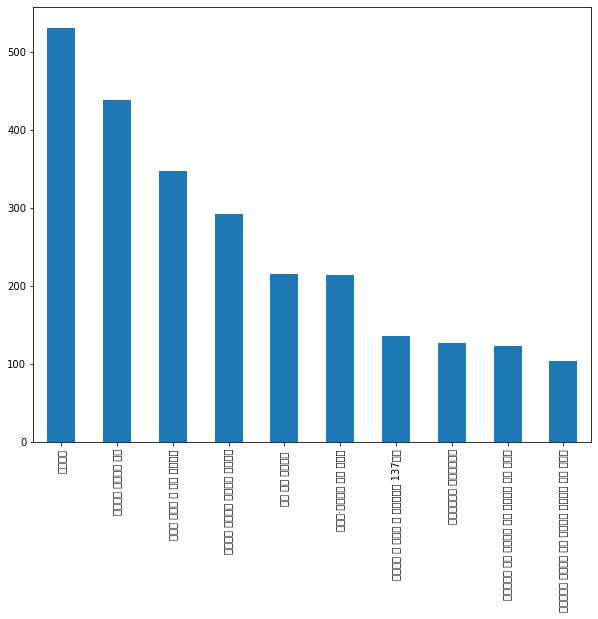

In [77]:
df_book['name_x'].value_counts()[:10].plot(kind='bar')

In [130]:
# top1. 비만 문답은 2-30대가 가장 많이 구매함
book_sum = df_book['age_group'][df_book['name_x'] == '비만문답'].value_counts().sum()
round(df_book['age_group'][df_book['name_x'] == '비만문답'].value_counts() / book_sum, 2)


30-39    0.41
20-29    0.38
40-49    0.16
50-59    0.05
60-      0.00
Name: age_group, dtype: float64

In [82]:
df_book['customer_id'][df_book['name_x'] == '비만문답'].value_counts()

5d9a8bbe0dabe405b156dfdc    2
5eeb1a92e510ee503167cf7f    2
5e5223e84267e105dfff2112    1
60498f640ccc56001bc78700    1
5ec3586fe510ee503167aa4c    1
                           ..
5d969b160dabe405b156da75    1
5d6f83c119efa30eb2914138    1
5ec4bf6fe510ee503167ac71    1
5da047700dabe405b156e6d5    1
5f9a94c0512031633432077c    1
Name: customer_id, Length: 529, dtype: int64

# 고객 분류 별 나이 분포


In [162]:
# 원장님
ceo_doctor = df_clean[(df_clean['한의사 여부'] == 1.0) & (df_clean['사업자 여부'] == 1.0)]

# 페이 닥터
pay_doctor = df_clean[(df_clean['한의사 여부'] == 1.0) & (df_clean['사업자 여부'] == 0.0)]

# 한의대생
student = df_clean[(df_clean['한의사 여부'] == 0.0) & (df_clean['사업자 여부'] == 0.0)]

# 창업가?
ceo = df_clean[(df_clean['한의사 여부'] == 0.0) & (df_clean['사업자 여부'] == 1.0)]

all = [ceo, ceo_doctor, student, pay_doctor]


print('각 segment별 나이 비율: ')
print()
all = [ceo_doctor, pay_doctor, ceo, student]
for i in all:
    a = i.age_group.value_counts().sum()
    print(round(i.age_group.value_counts() / a, 2))
    print()

각 segment별 나이 비율: 

30-39    0.60
40-49    0.20
20-29    0.14
50-59    0.06
60-      0.01
Name: age_group, dtype: float64

20-29    0.65
30-39    0.29
40-49    0.04
50-59    0.01
60-      0.00
0-9      0.00
Name: age_group, dtype: float64

30-39    0.66
20-29    0.21
40-49    0.12
50-59    0.01
Name: age_group, dtype: float64

20-29    0.89
30-39    0.09
40-49    0.02
50-59    0.00
Name: age_group, dtype: float64



In [192]:
# 원장님
ceo_doctor = df_clean[(df_clean['한의사 여부'] == 1.0) & (df_clean['사업자 여부'] == 1.0)]

# 페이 닥터
pay_doctor = df_clean[(df_clean['한의사 여부'] == 1.0) & (df_clean['사업자 여부'] == 0.0)]

# 한의대생
student = df_clean[(df_clean['한의사 여부'] == 0.0) & (df_clean['사업자 여부'] == 0.0)]

# 창업가?
ceo = df_clean[(df_clean['한의사 여부'] == 0.0) & (df_clean['사업자 여부'] == 1.0)]

all = [ceo, ceo_doctor, student, pay_doctor]
# all_2 = ['ceo', 'ce/o_doctor', 'student', 'pay_doctor'] 

print('각 segment별 most popular: ')
print()

# for i in all_2:
#     print(f"[{i}]")
    
for j in all:
#     print(j.index)
    a = j.name_x.value_counts().head(5).sum()
    print(round(j.name_x.value_counts().head(5) / a, 2))
    print()

각 segment별 most popular: 

[멤버스] Medistream MEMBERS _구독가입형    0.39
동방 일회용 부항컵 1,000개                  0.39
<도전! 베스트 강의> 올인원 패키지               0.09
온뜸 의료용 양면테이프                       0.07
초음파 유도하 침 시술 가이드북                  0.07
Name: name_x, dtype: float64

동방 일회용 부항컵 1,000개       0.51
임상해부학 특강: 골학 02. 상지     0.17
비만문답                    0.12
플로차트 정형외과 진단            0.10
<도전! 베스트 강의> 올인원 패키지    0.09
Name: name_x, dtype: float64

[제32기 전졸협] 국시특강 외과학        0.2
[제32기 전졸협] 국시특강 본초학특강      0.2
[제32기 전졸협] 국시특강 신계내과학      0.2
[제32기 전졸협] 국시특강 안이비인후과학    0.2
[제32기 전졸협] 국시특강 간계내과학      0.2
Name: name_x, dtype: float64

[보수교육] 척추신경추나의학회 2022년 5월 온라인 중앙세미나    0.24
<도전! 베스트 강의> 올인원 패키지                   0.24
비만문답                                   0.20
플로차트 정형외과 진단                           0.16
방성혜 부인과 전문의서 처방 강의                     0.16
Name: name_x, dtype: float64



In [145]:
all = ['ceo', 'ceo_doctor', 'student', 'pay_doctor']

for i in range(all):
    a = all[i].age_group.value_counts()
    print(a)

TypeError: 'list' object cannot be interpreted as an integer

In [95]:
what['name_x'].value_counts()

[멤버스] Medistream MEMBERS _구독가입형          144
동방 일회용 부항컵 1,000개                         83
부항컵 동방 일회용 1,000개                         61
<도전! 베스트 강의> 올인원 패키지                      32
온뜸 의료용 양면테이프                              24
                                        ... 
[SPIRIT] 간호사용 고급형 3색상혼합(CK-603PW)          1
아크메시 브이넥 프론트 3포켓 스크럽 여성 탑 WARM GRAY        1
[씨케이주식회사] 사인초 600g, 베트남                    1
크라시에 육군자탕 엑스세립                             1
청병 6도(대) 무광 2줄라인 금색 내경 22mm 100개세트/1봉      1
Name: name_x, Length: 653, dtype: int64

In [99]:
display(df_clean['product_ids'][df_clean['name_x'] == '동방 일회용 부항컵 1,000개'].unique())
display(df_clean['product_ids'][df_clean['name_x'] == '부항컵 동방 일회용 1,000개'].unique())

array(['5ff2d56f5ae455001b219ae2'], dtype=object)

array(['5ff2d56f5ae455001b219ae2'], dtype=object)

In [100]:
a = df_clean['product_ids'][df_clean['name_x'] == '동방 일회용 부항컵 1,000개'].unique()
b = df_clean['product_ids'][df_clean['name_x'] == '부항컵 동방 일회용 1,000개'].unique()
a == b

array([ True])

# 부항컵 preprocessing

In [113]:
# 동방 일회용 부항컵 1,000개 == 부항컵 동방 일회용 1,000개 같은 제품이다. product_id가 같다.

df_clean['name_x'][df_clean['name_x'] == '부항컵 동방 일회용 1,000개'] = df_clean['name_x'][df_clean['name_x'] == '부항컵 동방 일회용 1,000개'].apply(lambda x: '동방 일회용 부항컵 1,000개' if x == '부항컵 동방 일회용 1,000개' else None)

In [116]:
df_clean[df_clean['name_x'] == '동방 일회용 부항컵 1,000개']

,_id,customer_id,age_group,한의사 여부,사업자 여부,name_x,name,slug,product_ids,category_id_y,regular_price,date_paid,paid,cancelled
139099,627c5d8c9d93880024063407,5fa11f3c51203163343214dd,30-39,1.0,1.0,"동방 일회용 부항컵 1,000개",소모품,expendables,5ff2d56f5ae455001b219ae2,5e91ce6fbfe42609447852d1,117000,2022-05-12 01:06:46,1,0
139111,627c619b9d93880024063435,5d631b614e77525ec5ca15cb,30-39,1.0,1.0,"동방 일회용 부항컵 1,000개",소모품,expendables,5ff2d56f5ae455001b219ae2,5e91ce6fbfe42609447852d1,117000,2022-05-12 01:24:11,1,0
139121,627c638d9d9388002406345d,5d6f8d2319efa30eb2914160,30-39,0.0,1.0,"동방 일회용 부항컵 1,000개",소모품,expendables,5ff2d56f5ae455001b219ae2,5e91ce6fbfe42609447852d1,117000,2022-05-12 01:32:49,1,0
139202,627c77b79d93880024063579,5d69aa4e19efa30eb2913dd1,30-39,1.0,1.0,"동방 일회용 부항컵 1,000개",소모품,expendables,5ff2d56f5ae455001b219ae2,5e91ce6fbfe42609447852d1,117000,2022-05-12 02:58:21,1,0
139207,627c7b569d93880024063592,5f65416048060c52caf14217,30-39,1.0,1.0,"동방 일회용 부항컵 1,000개",소모품,expendables,5ff2d56f5ae455001b219ae2,5e91ce6fbfe42609447852d1,117000,2022-05-12 03:18:13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206923,63200f8e6c2e37002369ee1c,5db7b9f60dabe405b156f807,30-39,1.0,1.0,"동방 일회용 부항컵 1,000개",소모품,expendables,5ff2d56f5ae455001b219ae2,5e91ce6fbfe42609447852d1,117000,2022-09-13 05:05:39,1,0
206930,6320122c6c2e37002369ee3e,5f32053fa0b91001bf48c060,30-39,1.0,1.0,"동방 일회용 부항컵 1,000개",소모품,expendables,5ff2d56f5ae455001b219ae2,5e91ce6fbfe42609447852d1,117000,2022-09-13 05:16:53,1,0
207031,632017836c2e37002369ef2d,5dae9a600dabe405b156efcf,30-39,1.0,1.0,"동방 일회용 부항컵 1,000개",소모품,expendables,5ff2d56f5ae455001b219ae2,5e91ce6fbfe42609447852d1,117000,2022-09-13 05:39:51,1,0
207041,63201a636c2e37002369ef50,5f362f6ba0b91001bf48cb2c,30-39,1.0,1.0,"동방 일회용 부항컵 1,000개",소모품,expendables,5ff2d56f5ae455001b219ae2,5e91ce6fbfe42609447852d1,117000,2022-09-13 05:51:56,1,0
